<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/Making_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/image_practice

/content/drive/MyDrive/image_practice


In [5]:
import matplotlib.pyplot as plt

(178, 218)
[[0.9838091  0.01619087]]
남


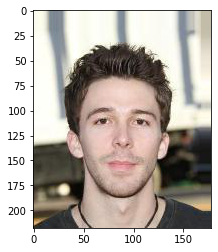

In [10]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# 모델 불러오기
model = load_model('keras_model.h5')

# 고차원 배열의 데이터를 다루기 위해 np.ndarray 생성
# 사진: shape=(샘플 수, 너이, 높이, 각 픽셀안에 색상 정보)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# 대상 이미지 열기
image = Image.open('002519.jpg')
plt.imshow(image)
imag12_size = image.size
print(imag12_size)

# 동일한 사이즈로 변경하기
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

# numpy 타입으로 변경하기
image_array = np.asarray(image)

# 정규화 작업(전처리) ==> 학습속도 및 성능 최적화에 도움이 됨
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# 불러운 numpy 타입의 이미지를 변수에 대입
data[0] = normalized_image_array

# 데이터 예측
prediction = model.predict(data)
print(prediction)

# 결과값 출력
# np.argmax(), np.argmin() : https://rfriend.tistory.com/356

class_name=['남', '여']
print(class_name[np.argmax(prediction)])

In [17]:
import cv2
import numpy as np
from glob import glob

## haarcascade 불러오기
face_case = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## 이미지 불러오기
img=cv2.imread('img_1.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## 얼굴찾기
faces=face_case.detectMultiScale(gray, 1.3, 5)
print(faces)

cnt=0
for (x, y, w, h) in faces:
    # 얼굴에 선 출력하기
    # cv2.rectangle(img, (x-25, y-25), (x+w+25, y+h+25), (255,0,0), 2)

    # 사진에서 열굴 인식 영역 이미지 추출하기
    roi_color=img[y-25: y+h+25, x-25:x+w+25]

    # 추출한 이미지 저장하기
    cv2.imwrite('./faces/faces_'+str(cnt).zfill(2)+'.jpg', roi_color)
    cnt+=1

fileList=glob('./faces/*.jpg')
fileList

[[470 115  55  55]
 [286 129  57  57]
 [620 130  54  54]
 [786 137  54  54]
 [700 157  56  56]
 [293 244  58  58]
 [833 170  65  65]
 [911 142  59  59]
 [369 153  59  59]
 [544 156  57  57]
 [675 275  59  59]
 [527 269  60  60]
 [755 276  57  57]]


['./faces/faces_02.jpg',
 './faces/faces_03.jpg',
 './faces/faces_00.jpg',
 './faces/faces_05.jpg',
 './faces/faces_06.jpg',
 './faces/faces_12.jpg',
 './faces/faces_10.jpg',
 './faces/faces_11.jpg',
 './faces/faces_01.jpg',
 './faces/faces_09.jpg',
 './faces/faces_04.jpg',
 './faces/faces_07.jpg',
 './faces/faces_08.jpg']

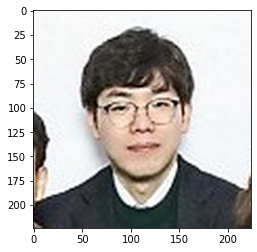

./faces/faces_02.jpg ====> 남


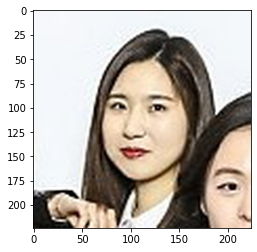

./faces/faces_03.jpg ====> 여


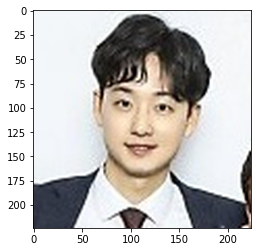

./faces/faces_00.jpg ====> 남


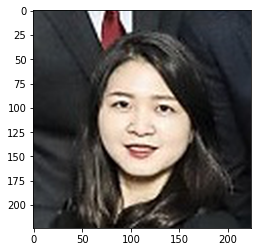

./faces/faces_05.jpg ====> 여


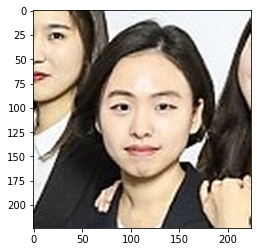

./faces/faces_06.jpg ====> 여


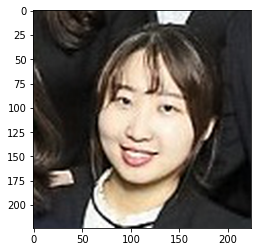

./faces/faces_12.jpg ====> 여


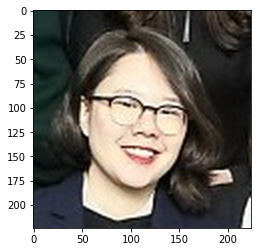

./faces/faces_10.jpg ====> 여


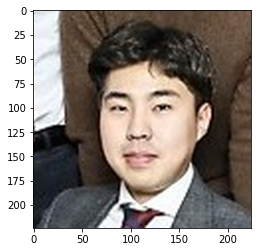

./faces/faces_11.jpg ====> 남


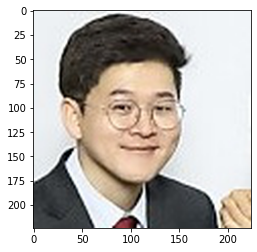

./faces/faces_01.jpg ====> 남


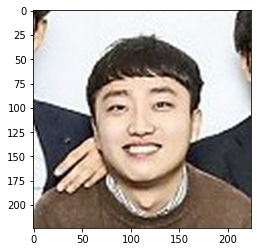

./faces/faces_09.jpg ====> 남


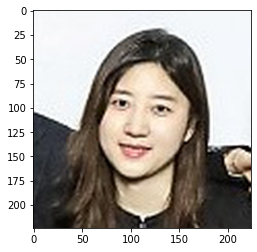

./faces/faces_04.jpg ====> 여


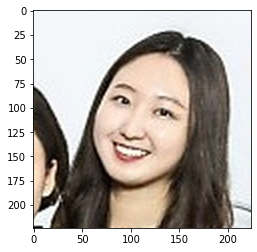

./faces/faces_07.jpg ====> 여


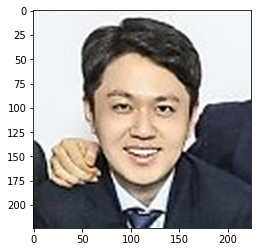

./faces/faces_08.jpg ====> 남


In [18]:
for i in fileList:
    image = Image.open(i)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model.predict(data)
    class_name=['남', '여']
    plt.imshow(image_array)
    plt.show()
    print(i, '====>', class_name[np.argmax([prediction])])

##단체사진에 남/여 표시하기

In [19]:
def model_prn(imgArea):
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(imgArea)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model.predict(data)

    class_name=['male', 'female']
    txt=class_name[np.argmax([prediction])] + '=> male:'+str(prediction[0][0]*100)+'/female:'+str(prediction[0][1]*100)

    return txt
    

In [21]:
#단체사진에서 개인 얼굴 추출 및 성별 확인
imgList=[]

for (x, y, w, h) in faces:
    roi_color=img[y-20: y+h+20, x-20:x+w+20]
    #대상 이미지 저장
    cv2.imwrite('tmp.jpg', roi_color)
    # model_prn 함수를 이용해 이미지 예측하기
    pred=model_prn("tmp.jpg")
    # 예측 결과 저장하기
    imgList.append(pred)
imgList

['male=> male:83.28912854194641/female:16.71087145805359',
 'male=> male:93.10275912284851/female:6.89724013209343',
 'male=> male:86.82225346565247/female:13.177745044231415',
 'female=> male:8.587738871574402/female:91.41226410865784',
 'female=> male:7.045014947652817/female:92.95498132705688',
 'female=> male:3.35538312792778/female:96.64462208747864',
 'female=> male:7.948970794677734/female:92.05102324485779',
 'female=> male:1.1281514540314674/female:98.87185096740723',
 'male=> male:74.12421107292175/female:25.875788927078247',
 'male=> male:96.69121503829956/female:3.308780863881111',
 'female=> male:26.16232931613922/female:73.83767366409302',
 'male=> male:92.81145930290222/female:7.18853622674942',
 'female=> male:19.80120986700058/female:80.1987886428833']

total count ==> male:6, female:7


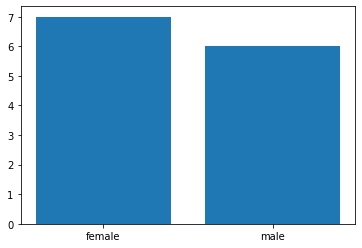

In [29]:
## 이미지속 남여 비율
## imgList에서 남여 비율 추출
gubun=[i.split("=>")[0] for i in imgList]
re=np.unique(gubun, return_counts=True)
plt.bar(re[0], re[1])

txt=f'total count ==> male:{re[1][1]}, female:{re[1][0]}'
print(txt)

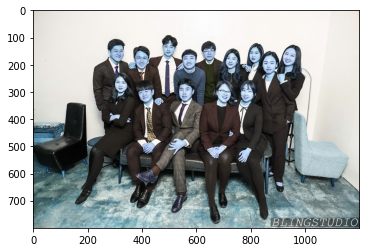

In [25]:
plt.imshow(img)

In [26]:
# 폰트 색상 지정
b=(255, 0, 0)
g=(0, 255, 0)
r=(0, 0, 255)
white=(255, 255, 255)
font=cv2.FONT_HERSHEY_PLAIN

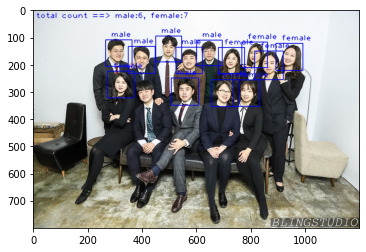

In [33]:
#cv2를 이용한 이미지에 글자 삽입(합성)
#putText(이미지,삽입글자,(x,y),font,굵기,선색상,선형태)
img=cv2.putText(img, txt, (10, 30), font, 2, b, 1, cv2.LINE_AA)

cv2.imwrite('./tmp_txt.jpg', img)  # 전체 남/여 데이터 좌측 상단 출력
# 윈도우 생성 및 이미지 출력
#cv2.imshow('faces', img)
#cv2.waitKey(0)
#$cv2.destroyAllWindows()

#저장한 이미지 읽어와 확인하기
imgtxt = Image.open("tmp_line_txt.jpg")
# plt.imshow(imgtxt)
# plt.show()

# 사람 얼굴별 성별 출력
for (x, y, w, h), result in zip(faces, gubun):
    cv2.rectangle(img, (x-20, y-20), (x+w+20, y+h+20), (255,0,0), 2) # 선 출력
    img=cv2.putText(img, result, (x, y-30), font, 2, b, 1, cv2.LINE_AA)

# 이미지 파일로 결과 저장
cv2.imwrite('tmp_line_txt.jpg', img)
imgtxtline = Image.open('tmp_line_txt.jpg')
plt.imshow(imgtxtline)
plt.show()

In [34]:
#단체사진 다시 읽어와 처리

In [35]:

# 이미지 불러오기
img = cv2.imread('img_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 
                                     'haarcascade_frontalface_default.xml')

===원본===


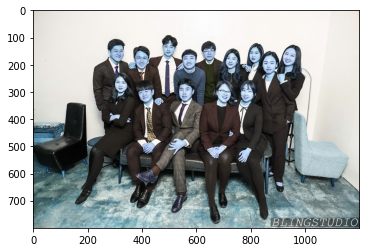

====모자이크====


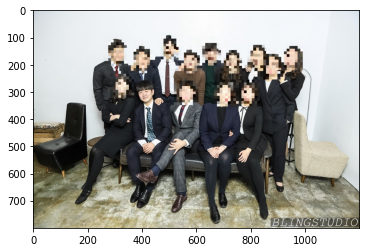

In [37]:
# 이미지 불러오기
img = cv2.imread('img_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# haarcascade 불러오기
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 
#                                     'haarcascade_frontalface_default.xml')

#모자이크 처리함수
def mosaic(src, ratio=0.1):   # ratio: 모자이크 배율
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

dst=img.copy()

for face in faces:
    x=face[0]       # 가로 시작위치
    y=face[1]       # 세로 시작위치
    width=face[2]   # 모자이크 넓이
    height=face[3]  # 모자이크 높이

    dst[y-20:y + height+20, x-20:x + width+20] = mosaic(dst[y-20:y + height+20, x-20:x + width+20])

cv2.imwrite('./face_mosaic_area.jpg', dst)
imgPrn = Image.open('./face_mosaic_area.jpg')
print("===원본===")
plt.imshow(img)
plt.show()
print("====모자이크====")
plt.imshow(imgPrn)
plt.show()